# 1. Import the CSV dataset:
  Data file imported and placed into data/adult.csv


In [11]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

datafile = os.path.join("sample_data", "adult.csv")
file_stats = os.stat(datafile)
print('Datafile: %s , size %.2f mb' % ( datafile, (file_stats.st_size / (1024 * 1024))))

Datafile: sample_data/adult.csv , size 3.91 mb


# 2 Identify the presence of missing values, fill the missing values with the mean for numerical attributes and mode value for categorical attributes


Convert the csv dataset to pandas dataframe 

In [12]:
df = pd.read_csv(datafile)
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [13]:
#Replace missing values with NaN so that we can count the nulls to understand which columns have missing values
df.replace('?', np.nan, inplace=True)
print(df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [14]:
#Given that we have only 3 columns which are having missing values and also they happen to be categorical, 
# we can selectively replace them with mode value as below, this is better for performance reasons
#  df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
#  df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
#  df['native.country'].fillna(df['native.country'].mode()[0], inplace=True)

# Downside of above approach is that we can encounter issues if dataset changes, hence using a dynamic approach as below

#Get all categorical columns and replace them with mode value
cat_features=[i for i in df.columns if df.dtypes[i]=='object']
for feature in cat_features:
  df[feature].fillna(df[feature].mode()[0], inplace=True)

#Get all numeric columns and replace them with mean value
numeric_features=[i for i in df.columns if df.dtypes[i]==np.number]
for nfeature in numeric_features:
  df[nfeature].fillna(df[nfeature].mean()[0], inplace=True)

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  from ipykernel import kernelapp as app


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# 3. Extract X as all columns except the Income column and Y as Income column.

In [22]:
output_column = 'income'

#df_columns=df.columns.values.tolist()
#input_columns=[i for i in df_columns if i not in output_column]

X=df.drop([output_column],axis=1)
y=df[output_column]

X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


#4. Visualize the dataset using any two appropriate graphs.


In [23]:
#Initialize matplot lib
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (9, 9)
colors = ['red','green','blue','cyan','orange','purple','yellow','black','magenta']

> ## 4.1 Mean age of *workclass*


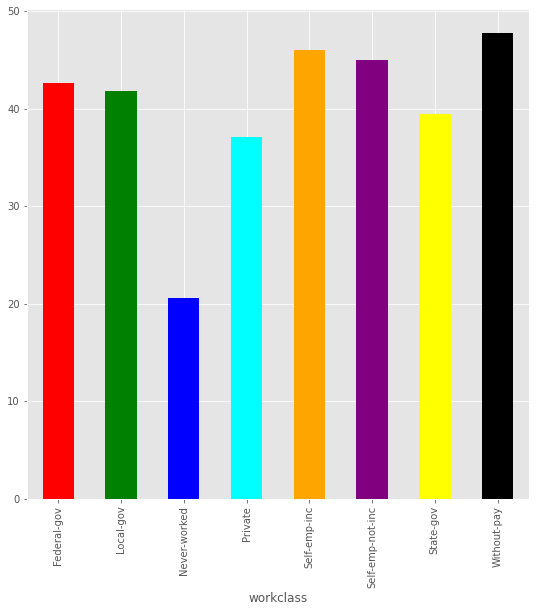

In [17]:
#Get mean age of workers grouped by profession type
mean_age = df.groupby("workclass")["age"].agg(["count", "mean"])

mean_age["mean"].plot.bar(color = colors);

*Observations:*
Data plot show indicate that most of the people retire after 45 years of age and hence are without pay.
Also, people having less than 20 years of age have never-worked since they might be pursuing their education.
People in private profession retire ar around 35 years.

> ## 4.2 View number of employees in each of the occupation types grouped by income (<50K or >50K)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


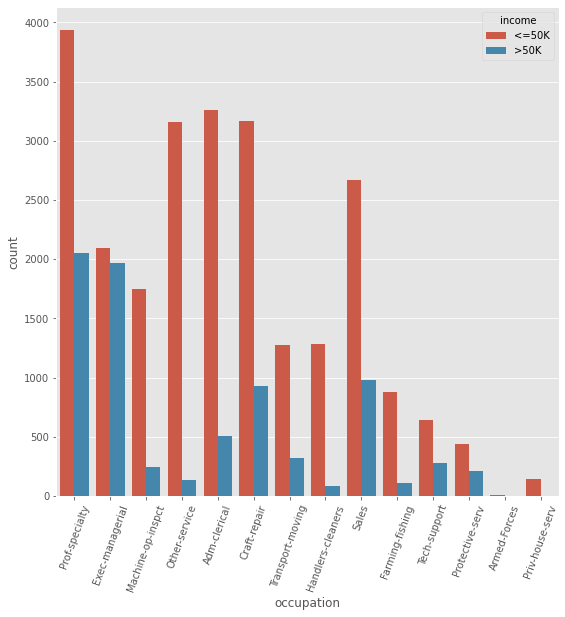

In [18]:
sns.countplot(df['occupation'],hue=df['income']);
plt.xticks(rotation=70);


Observations:
Most people across all the occupation types earn less than 50K.
Most of the employees in Exec-managerial occupation have very less variance in salary ranges.
Armed forces and private house servants have very less people earning >50K, infact looking at the graph plot it seems there are none.

> ## 4.3 Relation of education to income


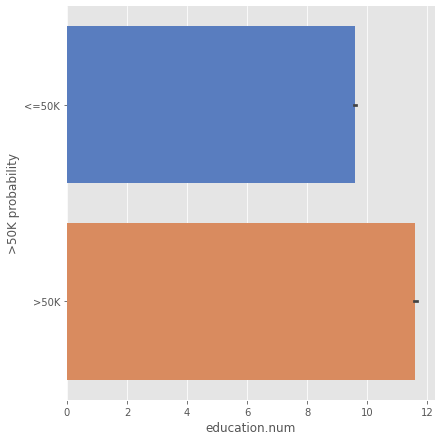

In [19]:
g = sns.catplot(x="education.num",y="income",data=df,kind="bar",height = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

#5. Split the data into a training set and testing set.

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature engineering etc...

In [45]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Feature Engineering

#Encode categorical variables
cat_features=[i for i in X_train.columns if X_train.dtypes[i]=='object']
for feature in cat_features:
  le = preprocessing.LabelEncoder()
  X_train[feature] = le.fit_transform(X_train[feature])
  X_test[feature] = le.transform(X_test[feature])

#Feature Scaling (increases accuracy)
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


#6. Perform 10-fold cross-validation

In [26]:
#Using 10 fold cross validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = LogisticRegression()

kfold = KFold(n_splits=10, random_state=10)
cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
print('Average accuracy = %2f' % cv_scores.mean())


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy = 0.824632


#7. Train a Logistic regression model for the dataset.

In [27]:
#Training and prediction (with test data) using Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


#8. Compute the accuracy and confusion matrix.

Logistic Regression accuracy score = 82.28
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      4966
        >50K       0.70      0.44      0.54      1547

    accuracy                           0.82      6513
   macro avg       0.77      0.69      0.72      6513
weighted avg       0.81      0.82      0.81      6513



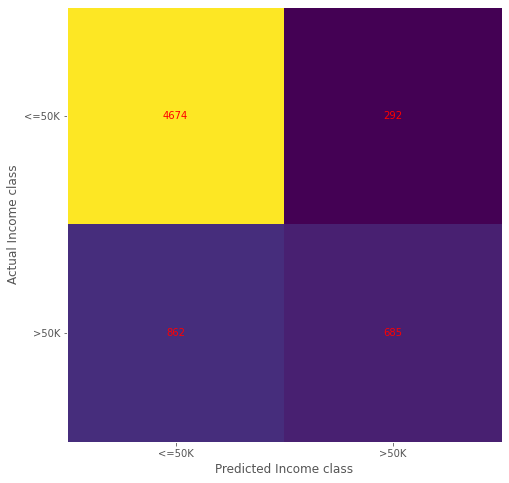

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print('Logistic Regression accuracy score = {0:0.2f}'. format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred) #, normalize='none')

#Printing the comfusion matrix
# ax= plt.subplot()
#sns.heatmap(cm, annot=True, ax = ax, fmt = 'g',cmap='Greens'); #annot=True to annotate cells

#ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
#ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(model.classes_); ax.yaxis.set_ticklabels(model.classes_);

#Another way (more recent)
#from sklearn.metrics import  ConfusionMatrixDisplay
#cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
#cmd.plot();

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted Income class');
ax.set_ylabel('Actual Income class'); 
ax.xaxis.set(ticks=(0, 1), ticklabels=(model.classes_))
ax.yaxis.set(ticks=(0, 1), ticklabels=(model.classes_))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()



#9. Plot the decision boundary, visualize training and test results

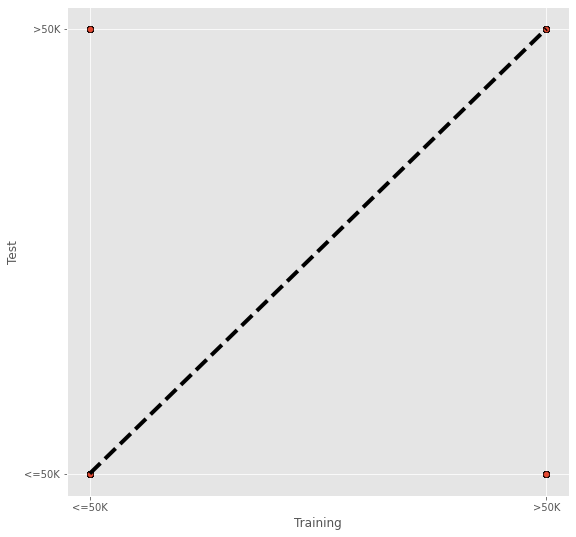

In [53]:
# See
# https://datascienceplus.com/building-a-logistic-regression-in-python-step-by-step/
# https://secml.readthedocs.io/en/stable/tutorials/01-Training.html
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(model, X_train, y_train, cv=10)

coeffs = model.coef_
intercept = model.intercept_

fig, ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Training')
ax.set_ylabel('Test')
plt.show()

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(X_train)
X_train, X_test, y_train, y_test = train_test_split(pca, y_train, random_state=0)

plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='YES', s=2, color='navy')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='NO', s=2, color='darkorange')
plt.legend()
plt.title('First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

IndexError: ignored

<Figure size 1080x1080 with 0 Axes>